In [1]:
!pip install nltk scikit-learn numpy pandas -q


**Importing the Dependencies**



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

**Data Loading & Understanding**

In [8]:
#loading the dataset to a pandas dataframe
df = pd.read_csv("movies.csv")

In [9]:
df.shape

(4803, 24)

In [10]:
df.head(3)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [12]:
#filter the required columns for the recommendation
required_columns = ["genres", "keywords", "overview", "title"]
df = df[required_columns]

In [13]:
df.shape

(4803, 4)

In [14]:
df.head(3)

,genres,keywords,overview,title
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre


In [16]:
#check for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4775 non-null   object
 1   keywords  4391 non-null   object
 2   overview  4800 non-null   object
 3   title     4803 non-null   object
dtypes: object(4)
memory usage: 150.2+ KB


In [17]:
df = df.dropna().reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4387 entries, 0 to 4386
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   genres    4387 non-null   object
 1   keywords  4387 non-null   object
 2   overview  4387 non-null   object
 3   title     4387 non-null   object
dtypes: object(4)
memory usage: 137.2+ KB


In [22]:
df["combined"] = df['genres'] + ' ' + df['keywords'] + ' ' + df['overview']

In [23]:
df.head(3)


,genres,keywords,overview,title,combined
0,Action Adventure Fantasy Science Fiction,culture clash future space war space colony so...,"In the 22nd century, a paraplegic Marine is di...",Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Adventure Fantasy Action,ocean drug abuse exotic island east india trad...,"Captain Barbossa, long believed to be dead, ha...",Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Action Adventure Crime,spy based on novel secret agent sequel mi6,A cryptic message from Bond’s past sends him o...,Spectre,Action Adventure Crime spy based on novel secr...


In [25]:
data = df[['title', 'combined']]

In [26]:
data.shape

(4387, 2)

In [27]:
data.head(3)

,title,combined
0,Avatar,Action Adventure Fantasy Science Fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...


In [28]:
#word cloud for movie contet
combined_text = ' '.join(data['combined'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

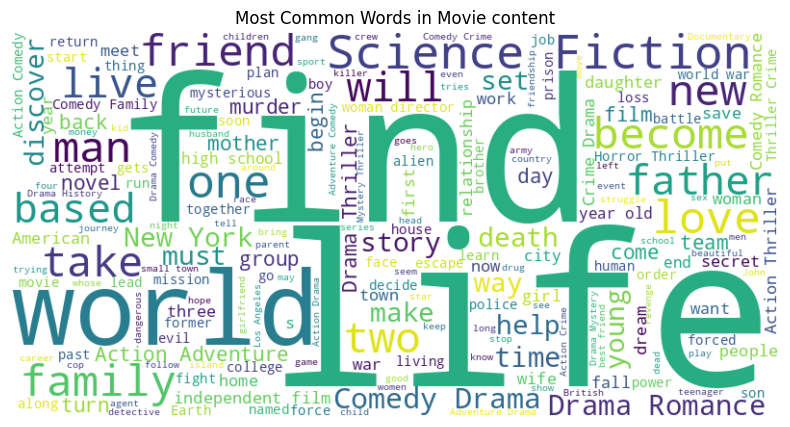

In [29]:
# WordCloud to visualize the most common words in the movie content
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Movie content")
plt.show()

In [30]:
#download nltk data
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [33]:
stop_words = set(stopwords.words('english'))

In [36]:
def preprocess_text(text):
  #remove special characters and numbers
  text = re.sub(r"[^a-zA-Z\s]", "", text)
  #convert to lower case
  text = text.lower()
  # Tokenize and remove stopwords
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  return " ".join(tokens)



In [37]:
#apply preprocessing to the movie content
data['cleaned_text'] = df['combined'].apply(preprocess_text)

/tmp/ipython-input-37-562575223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = df['combined'].apply(preprocess_text)


In [39]:
data.head(3)

,title,combined,cleaned_text
0,Avatar,Action Adventure Fantasy Science Fiction cultu...,action adventure fantasy science fiction cultu...
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action ocean drug abuse exot...,adventure fantasy action ocean drug abuse exot...
2,Spectre,Action Adventure Crime spy based on novel secr...,action adventure crime spy based novel secret ...


In [40]:
# Vectorization with TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features = 5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(data['cleaned_text'])

In [41]:
#compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [45]:
print(cosine_sim[2])

[0.0147396  0.03100093 1.         ... 0.00927083 0.01612183 0.        ]


In [53]:
#recommendation function
def recommend_movies(movie_name, cosine_sim=cosine_sim, df=data, top_n=5):
  #find the index of the movie
  idx = df[df['title'].str.lower() == movie_name.lower()].index
  if len(idx) == 0:
    return "Movie not found in the dataset"
  idx = idx[0]

  #Get similarity scores
  sim_score = list(enumerate(cosine_sim[idx]))
  sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
  sim_score = sim_score[1:top_n+1]

  #Get the indices of top similar movies
  movie_indices = [i[0] for i in sim_score]

  # Return top n similar movies
  return df[['title']].iloc[movie_indices]


In [54]:
data["title"]


,title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4382,Bang
4383,Primer
4384,El Mariachi
4385,"Signed, Sealed, Delivered"


In [56]:
# Example Recommendation
movie_name = "The Dark Knight"
print(f"Recommendations for the Movie {movie_name}")
recommendations = recommend_movies(movie_name)
print(recommendations)

Recommendations for the Movie The Dark Knight
                                        title
3                       The Dark Knight Rises
424                            Batman Returns
117                             Batman Begins
297                            Batman Forever
3623  Batman: The Dark Knight Returns, Part 2
